<a href="https://colab.research.google.com/github/mnogoruk/visualization/blob/hw3/HomeWork_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
while_wine_dataset_url = 'https://raw.githubusercontent.com/mnogoruk/visualization/main/winequality-white.csv'
red_wine_dataset_url = 'https://raw.githubusercontent.com/mnogoruk/visualization/main/winequality-red.csv'

In [61]:
white_wine_data_frame = pd.read_csv(while_wine_dataset_url, delimiter=';', error_bad_lines=False)
red_wine_data_frame = pd.read_csv(red_wine_dataset_url, delimiter=';', error_bad_lines=False)

In [62]:
white_wine_data_frame['type'] = 'white'
red_wine_data_frame['type'] = 'red'

In [63]:
merged_data_frame = pd.concat([white_wine_data_frame, red_wine_data_frame], ignore_index=True)

In [108]:
merged_data_frame.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [109]:
merged_data_frame.shape

(6497, 13)

In [110]:
df = merged_data_frame

In [111]:
cols = list(df.columns)
try:
  cols.remove('Unnamed: 0')
except ValueError:
  print('No empty columns')
cols

No empty columns


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

In [112]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'alcohol': 0,
 'chlorides': 0,
 'citric acid': 0,
 'density': 0,
 'fixed acidity': 0,
 'free sulfur dioxide': 0,
 'pH': 0,
 'quality': 0,
 'residual sugar': 0,
 'sulphates': 0,
 'total sulfur dioxide': 0,
 'type': 0,
 'volatile acidity': 0}

In [113]:
quality_distribution_df = df.groupby('quality').count()
quality_distribution_df.head

<bound method NDFrame.head of          fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  type
quality                                                ...                          
3                   30                30           30  ...         30       30    30
4                  216               216          216  ...        216      216   216
5                 2138              2138         2138  ...       2138     2138  2138
6                 2836              2836         2836  ...       2836     2836  2836
7                 1079              1079         1079  ...       1079     1079  1079
8                  193               193          193  ...        193      193   193
9                    5                 5            5  ...          5        5     5

[7 rows x 12 columns]>

In [114]:
quality_range = quality_distribution_df.index.values
quality_distribution = np.array([quality_distribution_df.loc[quality, 'type'] or 0 for quality in quality_range], dtype='float64')
quality_range, quality_distribution

(array([3, 4, 5, 6, 7, 8, 9]),
 array([  30.,  216., 2138., 2836., 1079.,  193.,    5.]))

<BarContainer object of 7 artists>

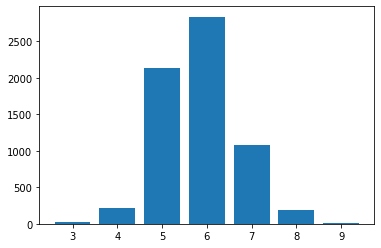

In [115]:
fig, ax = plt.subplots()
ax.bar(quality_range, quality_distribution)

In [116]:
red_wine_quality_distribution_df = red_wine_data_frame.groupby('quality').count()
white_wine_quality_distribution_df= white_wine_data_frame.groupby('quality').count()

In [117]:
red_wine_quality_distribution = np.array([red_wine_quality_distribution_df['type'].get(quality, 0) for quality in quality_range], dtype='float64')
white_wine_quality_distribution = np.array([white_wine_quality_distribution_df['type'].get(quality, 0) for quality in quality_range], dtype='float64')

In [118]:
data = {
    'Общее': quality_distribution,
    'Белое': white_wine_quality_distribution,
    'Красное': red_wine_quality_distribution,
    
}

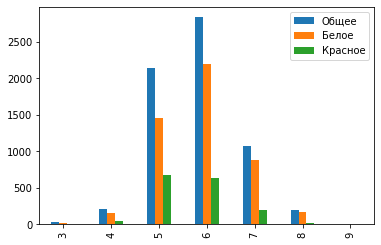

In [119]:
plot_df = pd.DataFrame(data, index=range(3, 10))
plot_df.plot(kind='bar')
plt.show()

In [120]:
quality_distribution /= np.sum(quality_distribution) / 100
red_wine_quality_distribution /= np.sum(red_wine_quality_distribution) / 100
white_wine_quality_distribution /= np.sum(white_wine_quality_distribution) / 100

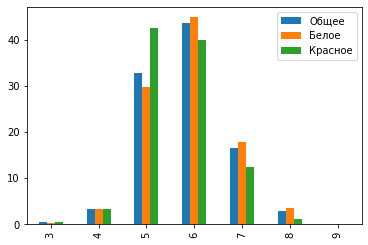

In [121]:
plot_df = pd.DataFrame(data, index=range(3, 10))
plot_df.plot(kind='bar')
plt.show()

In [122]:
wine_sorted_by_pH_df = df.iloc[np.lexsort((df.index, df.pH.values))]

In [123]:
wine_ph_sorted = wine_sorted_by_pH_df['pH'].values

In [124]:
wine_fixed_acidity = wine_sorted_by_pH_df['fixed acidity'].values
wine_volatile_acidity = wine_sorted_by_pH_df['volatile acidity'].values
wine_citric_acidity = wine_sorted_by_pH_df['citric acid'].values

Text(0.5, 0, 'pH')

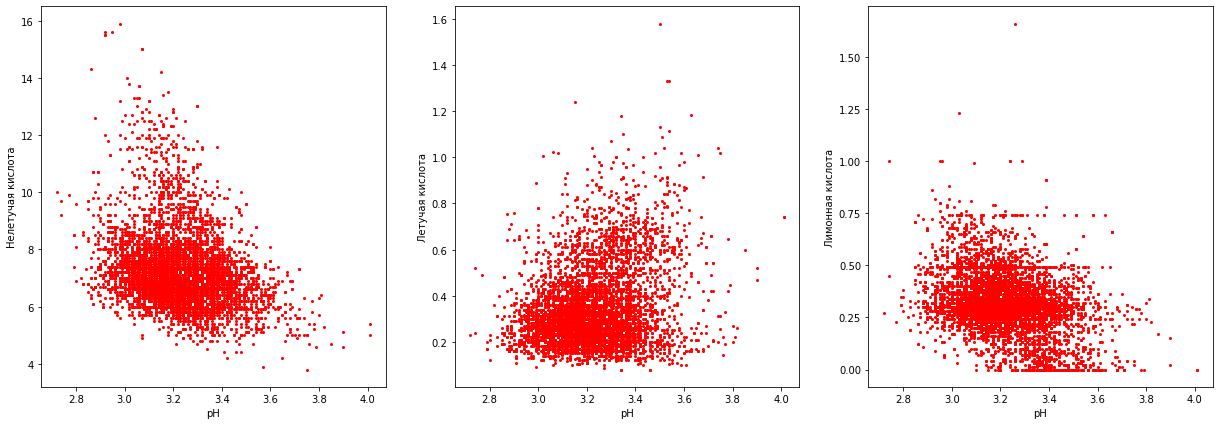

In [125]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(w=21, h=7)
axes[0].plot(wine_ph_sorted, wine_fixed_acidity, 'ro', ms=2)
axes[1].plot(wine_ph_sorted, wine_volatile_acidity, 'ro', ms=2)
axes[2].plot(wine_ph_sorted, wine_citric_acidity, 'ro', ms=2)
axes[0].set_ylabel('Нелетучая кислота')
axes[1].set_ylabel('Летучая кислота')
axes[2].set_ylabel('Лимонная кислота')
axes[0].set_xlabel('pH')
axes[1].set_xlabel('pH')
axes[2].set_xlabel('pH')


In [126]:
wine_mean_volatile_acidity = df['volatile acidity'].mean()
wine_mean_volatile_acidity

0.3396659996921661

In [127]:
wine_low_volatile_acidity = df[df['volatile acidity'] <= wine_mean_volatile_acidity]
wine_high_volatile_acidity = df[df['volatile acidity'] > wine_mean_volatile_acidity]
wine_low_volatile_acidity.shape, wine_high_volatile_acidity.shape

((4062, 13), (2435, 13))

In [128]:
wine_mean_quailty_for_low_volatile_acidity= wine_low_volatile_acidity['quality'].mean()
wine_mean_quailty_for_high_volatile_acidity= wine_high_volatile_acidity['quality'].mean()


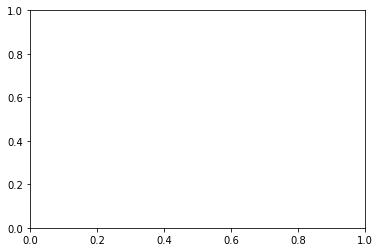

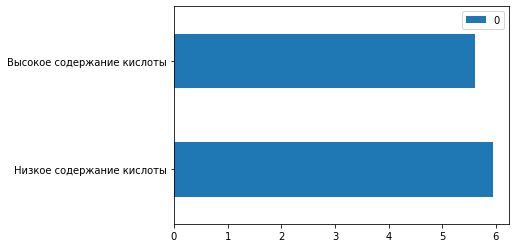

In [140]:
fig, ax = plt.subplots()
wine_mean_qualities_for_volatile_acidity_df = pd.DataFrame([wine_mean_quailty_for_low_volatile_acidity, wine_mean_quailty_for_high_volatile_acidity], index=["Низкое содержание кислоты", 'Высокое содержание кислоты'])
wine_mean_qualities_for_volatile_acidity_df.plot(kind='barh')

In [161]:
wine_amount = wine_sorted_by_pH_df.shape[0]

In [170]:
BATCH_AMOUNT = 20
batch_size = (wine_amount + BATCH_AMOUNT - 1) // BATCH_AMOUNT

In [171]:
wine_batches_sorted_by_pH = []

for batch_index in range(BATCH_AMOUNT):
  if batch_size * (batch_index + 1) < wine_amount:
    batch = wine_sorted_by_pH_df[batch_size * batch_index : batch_size * (batch_index + 1)]
  else:
    batch = wine_sorted_by_pH_df[batch_size * batch_index :]
  wine_batches_sorted_by_pH.append(batch)

In [172]:
wine_mean_qualities_for_different_sorted_pH = list(map(lambda x: x['quality'].mean(), wine_batches_sorted_by_pH))

<BarContainer object of 20 artists>

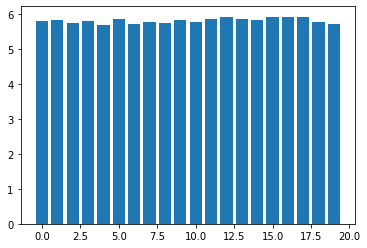

In [173]:
fig, ax = plt.subplots()
wine_mean_quality_for_different_sorted_pH_range = list(range(BATCH_AMOUNT))
ax.bar(wine_mean_quality_for_different_sorted_pH_range, wine_mean_qualities_for_different_sorted_pH)

In [ ]:
wine_sorted_by_alcohol_df =  df.iloc[np.lexsort((df.index, df['alcohol'].values))]

In [ ]:
wine_alcohol_sorted = wine_sorted_by_alcohol_df['alcohol'].values

In [ ]:
wine_residual_sugar = wine_sorted_by_alcohol_df['residual sugar'].values

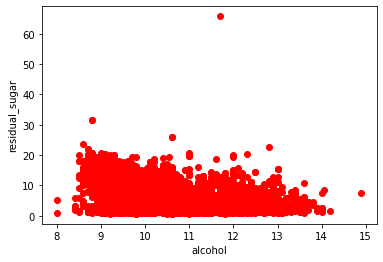

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('alcohol')
ax.set_ylabel('residual_sugar')
ax.plot(wine_alcohol_sorted, wine_residual_sugar, 'ro')



In [ ]:
wine_max_alcohol = df['alcohol'].max()
wine_min_alcohol = df['alcohol'].min()
wine_max_alcohol, wine_min_alcohol

(14.9, 8.0)

In [ ]:
ALCOHOL_GROUP_AMOUNT = 4
alochol_step = (wine_max_alcohol - wine_min_alcohol) / ALCOHOL_GROUP_AMOUNT

In [ ]:
alcohol_level = 1
alcohol_levels = []
wine_counts_for_different_alcohol = []


for current_lcohol_level in np.arange(wine_min_alcohol, wine_max_alcohol, alochol_step):

  condition_mask = df['alcohol'] < (current_lcohol_level + alochol_step)
  condition_mask &= df['alcohol'] >= current_lcohol_level 
  batch = df.where(condition_mask)

  wine_count_for_current_alcohol_level = batch['type'].count()

  wine_counts_for_different_alcohol.append(wine_count_for_current_alcohol_level)
  alcohol_levels.append(f"alcohol_level = {alcohol_level}")

  alcohol_level += 1

In [ ]:
alcohol_level_info = pd.DataFrame({"": wine_counts_for_different_alcohol}, index=alcohol_levels)
alcohol_level_info

,
alcohol_level = 1,2227
alcohol_level = 2,2856
alcohol_level = 3,1311
alcohol_level = 4,102


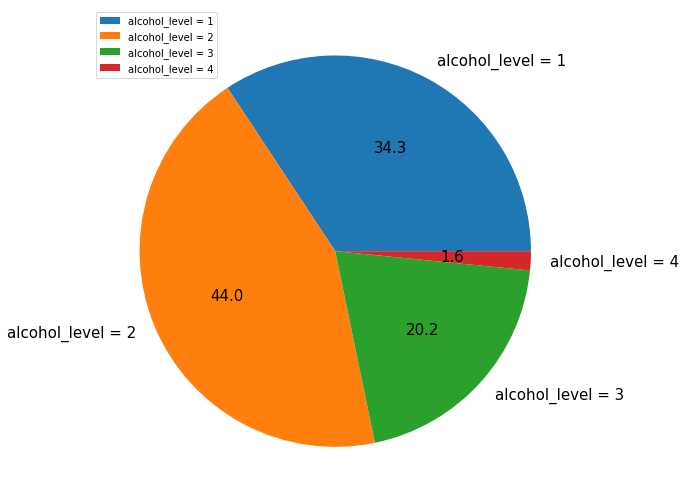

In [ ]:
fig, ax = plt.subplots()

alcohol_level_info.plot.pie(ax=ax, y='',  autopct="%.1f", fontsize=15, figsize=(15, 9))

In [ ]:
def slice_into_batches(batch_amount, data_frame):
  
  amount = data_frame.size
  batch_size = (amount + batch_amounr - 1) // batch_amount
  batches = []

  for batch_index in range(batch_amount):
    if batch_size * (batch_index + 1) < amount:
      batch = data_frame[batch_size * batch_index : batch_size * (batch_index + 1)]
    else:
      batch = data_frame[batch_size * batch_index :]
    batches.append(batch)
  return batches


  

In [ ]:
wine_sorted_by_sulphates_df = df.iloc[np.lexsort((df.index, df['sulphates'].values))]
wine_sulphates_sorted = wine_sorted_by_sulphates_df['sulphates'].values
wine_free_sulfur_dioxide = wine_sorted_by_sulphates_df['free sulfur dioxide'].values
wine_total_sulfur_dioxide = wine_sorted_by_sulphates_df['total sulfur dioxide'].values

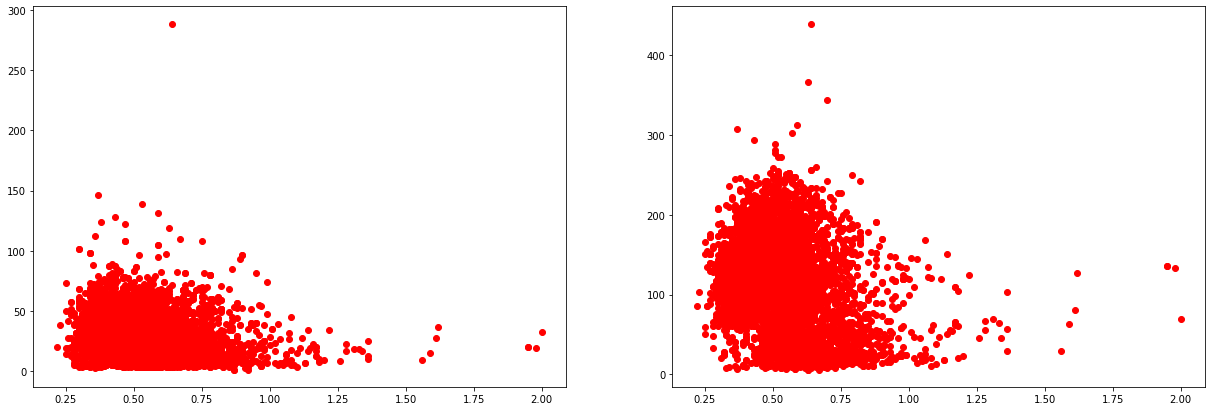

In [ ]:
fig, axex = plt.subplots(ncols=2)
fig.set_size_inches(21, 7)
axex[0].plot(wine_sulphates_sorted, wine_free_sulfur_dioxide, 'ro')
axex[1].plot(wine_sulphates_sorted, wine_total_sulfur_dioxide, 'ro')

In [ ]:
wine_sorted_by_total_sulfur_dioxide_df = df.iloc[np.lexsort((df.index, df['total sulfur dioxide'].values))]
wine_total_sulfur_dioxide_sorted = wine_sorted_by_total_sulfur_dioxide_df['total sulfur dioxide'].values
wine_free_sulfur_dioxide = wine_sorted_by_total_sulfur_dioxide_df['free sulfur dioxide'].values

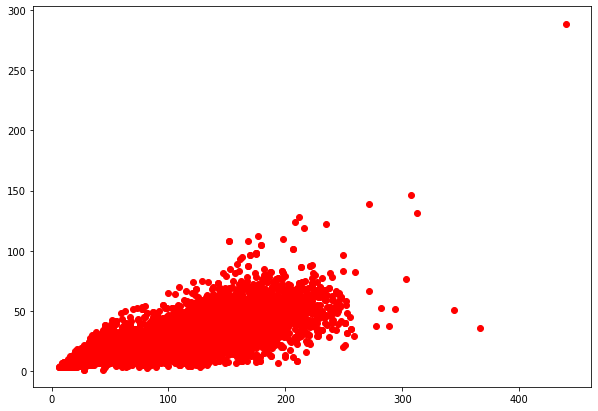

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(wine_total_sulfur_dioxide_sorted, wine_free_sulfur_dioxide, 'ro')
